In [3]:
#pip install tavily-python

In [1]:
import os
from dotenv import load_dotenv
import dotenv
import getpass
load_dotenv()


def _set_env_(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")
        dotenv.set_key(".env","TAVILY_API_KEY",os.environ[var])

_set_env_("TAVILY_API_KEY")

In [2]:
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "Customer Support Bot Tutorial"

### Setup the connection to the flight database

In [3]:
import shutil
import sqlite3
import pandas as pd
import requests



db_url = "https://storage.googleapis.com/benchmarks-artifacts/travel-db/travel2.sqlite"
local_file = "travel2.sqlite"
backup_file = "travel2.backup.sqlite"

#The backup is to reset the database in each tutorial section

overwrite = False


if overwrite or not os.path.exists(local_file):
    response = requests.get(db_url)
    response.raise_for_status()  # Ensure the request status
    with open(local_file, 'wb')  as f:
        f.write(response.content)
    
        #Backup we will use this to reset our DB in each section
    with open(backup_file, 'wb') as f:
        shutil.copy(local_file, backup_file)



# Convert teh flights to present time for our tutorial

conn = sqlite3.connect(local_file)
cursor = conn.cursor()

In [4]:
backup_file

'travel2.backup.sqlite'

### Connect to the sqlite db

In [5]:
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn).name.tolist()

tdf = {}

for t in tables:
    tdf[t] = pd.read_sql(f"SELECT * from {t}",conn)

example_time = pd.to_datetime(
    tdf["flights"]["actual_departure"].replace("\\N", pd.NaT)
).max()
current_time = pd.to_datetime("now").tz_localize(example_time.tz)
time_diff = current_time - example_time

tdf["bookings"]["book_date"] = (
    pd.to_datetime(tdf["bookings"]["book_date"].replace("\\N", pd.NaT), utc=True)
    + time_diff
)

In [182]:
query = "SELECT * FROM flights WHERE departure_airport = ?"
params = ["BSL"]
cursor.execute(query,params)
cursor.fetchall()

[(1185,
  'QR0051',
  '2024-08-26 02:16:40.971655-04:00',
  '2024-08-26 07:21:40.971655-04:00',
  'BSL',
  'BKK',
  'Scheduled',
  '319',
  None,
  None),
 (1,
  'DL0042',
  '2024-07-01 02:01:40.971655-04:00',
  '2024-07-01 02:56:40.971655-04:00',
  'BSL',
  'HAM',
  'Arrived',
  '321',
  '2024-07-01 02:10:40.971655-04:00',
  '2024-07-01 03:05:40.971655-04:00'),
 (2,
  'UA0047',
  '2024-07-21 11:31:40.971655-04:00',
  '2024-07-21 12:26:40.971655-04:00',
  'BSL',
  'HAM',
  'Arrived',
  '321',
  '2024-07-21 11:32:40.971655-04:00',
  '2024-07-21 12:27:40.971655-04:00'),
 (3,
  'DL0042',
  '2024-07-21 02:01:40.971655-04:00',
  '2024-07-21 02:56:40.971655-04:00',
  'BSL',
  'HAM',
  'Arrived',
  '321',
  '2024-07-21 02:05:40.971655-04:00',
  '2024-07-21 03:00:40.971655-04:00'),
 (4,
  'EK0005',
  '2024-08-25 04:51:40.971655-04:00',
  '2024-08-25 05:46:40.971655-04:00',
  'BSL',
  'HAM',
  'Scheduled',
  '321',
  None,
  None),
 (5,
  'DL0042',
  '2024-08-01 02:01:40.971655-04:00',
  '2024-

In [160]:
tdf['flights']

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,QR0051,2024-08-26 02:16:40.971655-04:00,2024-08-26 07:21:40.971655-04:00,BSL,BKK,Scheduled,319,None,None
1,3979,MU0066,2024-08-10 07:16:40.971655-04:00,2024-08-10 10:01:40.971655-04:00,SHA,CUN,Scheduled,CR2,None,None
2,4739,QF0126,2024-08-21 04:56:40.971655-04:00,2024-08-21 06:41:40.971655-04:00,SHA,AMS,Scheduled,763,None,None
3,5502,LX0136,2024-08-28 02:16:40.971655-04:00,2024-08-28 03:46:40.971655-04:00,OSL,PRG,Scheduled,763,None,None
4,6938,IB0075,2024-08-20 04:51:40.971655-04:00,2024-08-20 05:46:40.971655-04:00,OSL,RGN,Scheduled,SU9,None,None
...,...,...,...,...,...,...,...,...,...,...
33116,33117,CZ0061,2024-07-18 11:51:40.971655-04:00,2024-07-18 12:36:40.971655-04:00,NRT,OSL,Arrived,CR2,2024-07-18 11:51:40.971655-04:00,2024-07-18 12:36:40.971655-04:00
33117,33118,CZ0061,2024-07-13 11:51:40.971655-04:00,2024-07-13 12:36:40.971655-04:00,NRT,OSL,Arrived,CR2,2024-07-13 11:56:40.971655-04:00,2024-07-13 12:41:40.971655-04:00
33118,33119,CZ0061,2024-08-24 11:51:40.971655-04:00,2024-08-24 12:36:40.971655-04:00,NRT,OSL,Scheduled,CR2,None,None
33119,33120,CZ0061,2024-07-17 11:51:40.971655-04:00,2024-07-17 12:36:40.971655-04:00,NRT,OSL,Arrived,CR2,2024-07-17 11:52:40.971655-04:00,2024-07-17 12:38:40.971655-04:00


In [159]:
t

['aircrafts_data',
 'airports_data',
 'boarding_passes',
 'bookings',
 'flights',
 'seats',
 'ticket_flights',
 'tickets',
 'car_rentals',
 'hotels',
 'trip_recommendations']

In [6]:
datetime_columns = [
    "scheduled_departure",
    "scheduled_arrival",
    "actual_departure",
    "actual_arrival",
]

for column in datetime_columns:
    tdf["flights"][column] = (
        pd.to_datetime(tdf["flights"][column].replace("\\N", pd.NaT)) + time_diff
    )


In [7]:
for table_name, df in tdf.items():
    df.to_sql(table_name, conn, if_exists="replace", index=False)
del df

In [8]:
del tdf
conn.commit()
conn.close()

In [9]:
db = local_file  # We'll be using this local file as our DB in this tutorial

In [64]:
import re

import numpy as np
from langchain_groq import ChatGroq
from langchain_core.tools import tool
from langchain_huggingface import HuggingFaceEmbeddings
#from .autonotebook import tqdm as notebook_tqdm

response = requests.get(
    "https://storage.googleapis.com/benchmarks-artifacts/travel-db/swiss_faq.md"
)

response.raise_for_status()
faq_text = response.text


docs = [{"page_content": txt} for txt in re.split(r"(?=\n##)", faq_text)]

class VectorStoreRetriever:
    def __init__(self, docs: list, vectors: list, oai_client):
        self._arr = np.array(vectors)
        self._docs = docs
        self._client = oai_client

    @classmethod
    def from_docs(cls, docs, oai_client):
        embeddings = HuggingFaceEmbeddings(
            model_name = "sentence-transformers/all-mpnet-base-v2",
            model_kwargs = {'device': 'cpu'},
            encode_kwargs = {'normalize_embeddings': False}
        )
        
        #oai_client.embeddings.create(
            #model="text-embedding-3-small", input=[doc["page_content"] #for doc in docs]
        #)

        vectors = [emb for emb in embeddings.embed_documents(doc["page_content"] for doc in docs)]
        return cls(docs, vectors, oai_client)

    def query(self, query: str, k: int = 5) -> list[dict]:
        embeddings = HuggingFaceEmbeddings(
            model_name = "sentence-transformers/all-mpnet-base-v2",
            model_kwargs = {'device': 'cpu'},
            encode_kwargs = {'normalize_embeddings': False}
        )

        #embed = self._client.embeddings.create(
        #    model="text-embedding-3-small", input=[query]
        #)

        embed = embeddings.embed_query(query)

        # "@" is just a matrix multiplication in python
        scores = np.array(embed) @ self._arr.T
        top_k_idx = np.argpartition(scores, -k)[-k:]
        top_k_idx_sorted = top_k_idx[np.argsort(-scores[top_k_idx])]
        return [
            {**self._docs[idx], "similarity": scores[idx]} for idx in top_k_idx_sorted
        ]



In [151]:
client = ChatGroq(model="gemma2-9b-it",temperature=0)

In [155]:
client.model_name

'gemma2-9b-it'

In [66]:
retriever = VectorStoreRetriever.from_docs(docs, client)

retriever.query("what is the company policy regarding cancellation")

## Flights

In [13]:
print(
"""Define the (fetch_user_flight_information) tool to let the agent see the current users's flight information. Then define tools to search for flights and manage the passengers's bookings stored in the SQL database.

We use ensure_config to pass in the passenger_id in via configureable parameters. The LLM never has to provide these explicitly, they are provided for a given incovation fo thte graph so that each user cannot access other passengers' booking information.
""")

Define the (fetch_user_flight_information) tool to let the agent see the current users's flight information. Then define tools to search for flights and manage the passengers's bookings stored in the SQL database.

We use ensure_config to pass in the passenger_id in via configureable parameters. The LLM never has to provide these explicitly, they are provided for a given incovation fo thte graph so that each user cannot access other passengers' booking information.



In [14]:
from datetime import datetime
import pytz


# Create a timezone object for India

india_tz = pytz.timezone("Asia/Kolkata")


# Get the current time in India

print("Current time in india is ", datetime.now(india_tz))

Current time in india is  2024-08-01 20:04:26.340869+05:30


In [124]:
import sqlite3
from datetime import date, datetime
from typing import Optional

import pytz
from langchain_core.runnables import ensure_config



def fetch_user_flight_information(passenger_id: str) -> list[dict]:
    """Fetch all tickets for the user along with corresponding flight information and seat assignments.

    Returns:
        A list of dictionaries where each dictionary contains the ticket details,
        associated flight details, and the seat assignments for each ticket belonging to the user.
    """
    # config = ensure_config() # Fetch from the context
    # configuration = config.get("configurable", {})
    # passenger_id = configuration.get("passenger_id",None)
    if not passenger_id:
        raise ValueError("No passenger ID configured.")
    conn = sqlite3.connect(db)
    cursor = conn.cursor()
    query = """
    SELECT 
        t.ticket_no, t.book_ref,
        f.flight_id, f.flight_no, f.departure_airport, f.arrival_airport, f.scheduled_departure, f.scheduled_arrival,
        bp.seat_no, tf.fare_conditions
    FROM 
        tickets t
        JOIN ticket_flights tf ON t.ticket_no = tf.ticket_no
        JOIN flights f ON tf.flight_id = f.flight_id
        JOIN boarding_passes bp ON bp.ticket_no = t.ticket_no AND bp.flight_id = f.flight_id
    WHERE 
        t.passenger_id = ?
    """
    cursor.execute(query, (passenger_id,))
    rows = cursor.fetchall()
    column_names = [column[0] for column in cursor.description]
    results = [dict(zip(column_names, row)) for row in rows]

    cursor.close()
    conn.close()

    return results



def search_flights(
    departure_airport: str,
    arrival_airport: str,
    start_time: Optional[date | datetime] = None,
    end_time: Optional[date | datetime] = None,
    limit: int = 5,
) -> list[dict]:
    """Search for flights based on departure_airport, arrival_airport,start_time and end_time.If no time is provided by the user, then the start and end_time should be the minimum time and the maximum time in the database.
    
    Returns:
        A list containing flight informations as dictionaries
    """
    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    query = "SELECT * FROM flights WHERE 1 = 1"
    params = []

    if departure_airport:
        query += " AND departure_airport = ?"
        params.append(departure_airport)

    if arrival_airport:
        query += " AND arrival_airport = ?"
        params.append(arrival_airport)

    if start_time:
        query += " AND scheduled_departure >= ?"
        params.append(start_time)

    if end_time:
        query += " AND scheduled_departure <= ?"
        params.append(end_time)
    query += " LIMIT ?"
    params.append(limit)
    cursor.execute(query, params)
    rows = cursor.fetchall()
    column_names = [column[0] for column in cursor.description]
    results = [dict(zip(column_names, row)) for row in rows]

    cursor.close()
    conn.close()

    return results


def update_ticket_to_new_flight(ticket_no: str, new_flight_id: int) -> str:
    """Update the user's ticket to a new valid flight."""
    config = ensure_config()
    configuration = config.get("configurable", {})
    passenger_id = configuration.get("passenger_id", None)
    if not passenger_id:
        raise ValueError("No passenger ID configured.")

    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    cursor.execute(
        "SELECT departure_airport, arrival_airport, scheduled_departure FROM flights WHERE flight_id = ?",
        (new_flight_id,),
    )
    new_flight = cursor.fetchone()
    if not new_flight:
        cursor.close()
        conn.close()
        return "Invalid new flight ID provided."
    column_names = [column[0] for column in cursor.description]
    new_flight_dict = dict(zip(column_names, new_flight))
    timezone = pytz.timezone("Etc/GMT-3")
    current_time = datetime.now(tz=timezone)
    departure_time = datetime.strptime(
        new_flight_dict["scheduled_departure"], "%Y-%m-%d %H:%M:%S.%f%z"
    )
    time_until = (departure_time - current_time).total_seconds()
    if time_until < (3 * 3600):
        return f"Not permitted to reschedule to a flight that is less than 3 hours from the current time. Selected flight is at {departure_time}."

    cursor.execute(
        "SELECT flight_id FROM ticket_flights WHERE ticket_no = ?", (ticket_no,)
    )
    current_flight = cursor.fetchone()
    if not current_flight:
        cursor.close()
        conn.close()
        return "No existing ticket found for the given ticket number."

    # Check the signed-in user actually has this ticket
    cursor.execute(
        "SELECT * FROM tickets WHERE ticket_no = ? AND passenger_id = ?",
        (ticket_no, passenger_id),
    )
    current_ticket = cursor.fetchone()
    if not current_ticket:
        cursor.close()
        conn.close()
        return f"Current signed-in passenger with ID {passenger_id} not the owner of ticket {ticket_no}"

    # In a real application, you'd likely add additional checks here to enforce business logic,
    # like "does the new departure airport match the current ticket", etc.
    # While it's best to try to be *proactive* in 'type-hinting' policies to the LLM
    # it's inevitably going to get things wrong, so you **also** need to ensure your
    # API enforces valid behavior
    cursor.execute(
        "UPDATE ticket_flights SET flight_id = ? WHERE ticket_no = ?",
        (new_flight_id, ticket_no),
    )
    conn.commit()

    cursor.close()
    conn.close()
    return "Ticket successfully updated to new flight."



def cancel_ticket(ticket_no: str) -> str:
    """Cancel the user's ticket and remove it from the database."""
    config = ensure_config()
    configuration = config.get("configurable", {})
    passenger_id = configuration.get("passenger_id", None)
    if not passenger_id:
        raise ValueError("No passenger ID configured.")
    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    cursor.execute(
        "SELECT flight_id FROM ticket_flights WHERE ticket_no = ?", (ticket_no,)
    )
    existing_ticket = cursor.fetchone()
    if not existing_ticket:
        cursor.close()
        conn.close()
        return "No existing ticket found for the given ticket number."

    # Check the signed-in user actually has this ticket
    cursor.execute(
        "SELECT flight_id FROM tickets WHERE ticket_no = ? AND passenger_id = ?",
        (ticket_no, passenger_id),
    )
    current_ticket = cursor.fetchone()
    if not current_ticket:
        cursor.close()
        conn.close()
        return f"Current signed-in passenger with ID {passenger_id} not the owner of ticket {ticket_no}"

    cursor.execute("DELETE FROM ticket_flights WHERE ticket_no = ?", (ticket_no,))
    conn.commit()

    cursor.close()
    conn.close()
    return "Ticket successfully cancelled."

In [127]:
search_flights("BSL","MAD")

'Search for flights based on departure_airport, arrival_airport,start_time and end_time.If no time is provided by the user, then the start and end_time should be the minimum time and the maximum time in the database.\n    \n    Returns:\n        A list containing flight informations as dictionaries\n    '

In [68]:

def lookup_policy(query: str) -> str:
    """Consult the company policies to check whether certain options are permitted.
    Use this before making any flight changes performing other 'write' events."""
    docs = retriever.query(query, k=2)
    return docs
    return "\n\n".join([doc["page_content"] for doc in docs])

In [69]:
lookup_policy("what is the cancellation policy")

[{'page_content': '\n## How to Cancel a Swiss Air Flight: 877-5O7-7341 Step-by-Step Guide\nSwiss Air is a premium airline based in Switzerland that offers a range of domestic and international flights to passengers. However, sometimes situations arise where passengers may need to cancel their flights. In such cases, it is important to understand the Swiss Air Cancellation Policy to avoid any confusion or additional charges.\n\nSwiss International Airlines Cancellation Policy\nIn this article, we will provide you with everything you need to know about the Swiss Air Cancellation Policy, including how to cancel a Swiss Air flight, the fees associated with cancelling a flight, and the refund policy.\n\nIf you have booked a flight with Swiss Airlines but need to cancel it, it\'s important to understand their cancellation policy to avoid any unnecessary fees or charges.\nSwiss Airlines offers different fare types, each with their own specific cancellation terms and conditions. The most flexi

## Car Rental Tools

In [19]:
from datetime import date, datetime
from typing import Optional, Union



def search_car_rentals(
    location: Optional[str] = None,
    name: Optional[str] = None,
    price_tier: Optional[str] = None,
    start_date: Optional[Union[datetime, date]] = None,
    end_date: Optional[Union[datetime, date]] = None,
) -> list[dict]:
    """
    Search for car rentals based on location, name, price tier, start date, and end date.

    Args:
        location (Optional[str]): The location of the car rental. Defaults to None.
        name (Optional[str]): The name of the car rental company. Defaults to None.
        price_tier (Optional[str]): The price tier of the car rental. Defaults to None.
        start_date (Optional[Union[datetime, date]]): The start date of the car rental. Defaults to None.
        end_date (Optional[Union[datetime, date]]): The end date of the car rental. Defaults to None.

    Returns:
        list[dict]: A list of car rental dictionaries matching the search criteria.
    """
    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    query = "SELECT * FROM car_rentals WHERE 1=1"
    params = []

    if location:
        query += " AND location LIKE ?"
        params.append(f"%{location}%")
    if name:
        query += " AND name LIKE ?"
        params.append(f"%{name}%")
    # For our tutorial, we will let you match on any dates and price tier.
    # (since our toy dataset doesn't have much data)
    cursor.execute(query, params)
    results = cursor.fetchall()

    conn.close()

    return [
        dict(zip([column[0] for column in cursor.description], row)) for row in results
    ]



def book_car_rental(rental_id: int) -> str:
    """
    Book a car rental by its ID.

    Args:
        rental_id (int): The ID of the car rental to book.

    Returns:
        str: A message indicating whether the car rental was successfully booked or not.
    """
    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    cursor.execute("UPDATE car_rentals SET booked = 1 WHERE id = ?", (rental_id,))
    conn.commit()

    if cursor.rowcount > 0:
        conn.close()
        return f"Car rental {rental_id} successfully booked."
    else:
        conn.close()
        return f"No car rental found with ID {rental_id}."



def update_car_rental(
    rental_id: int,
    start_date: Optional[Union[datetime, date]] = None,
    end_date: Optional[Union[datetime, date]] = None,
) -> str:
    """
    Update a car rental's start and end dates by its ID.

    Args:
        rental_id (int): The ID of the car rental to update.
        start_date (Optional[Union[datetime, date]]): The new start date of the car rental. Defaults to None.
        end_date (Optional[Union[datetime, date]]): The new end date of the car rental. Defaults to None.

    Returns:
        str: A message indicating whether the car rental was successfully updated or not.
    """
    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    if start_date:
        cursor.execute(
            "UPDATE car_rentals SET start_date = ? WHERE id = ?",
            (start_date, rental_id),
        )
    if end_date:
        cursor.execute(
            "UPDATE car_rentals SET end_date = ? WHERE id = ?", (end_date, rental_id)
        )

    conn.commit()

    if cursor.rowcount > 0:
        conn.close()
        return f"Car rental {rental_id} successfully updated."
    else:
        conn.close()
        return f"No car rental found with ID {rental_id}."



def cancel_car_rental(rental_id: int) -> str:
    """
    Cancel a car rental by its ID.

    Args:
        rental_id (int): The ID of the car rental to cancel.

    Returns:
        str: A message indicating whether the car rental was successfully cancelled or not.
    """
    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    cursor.execute("UPDATE car_rentals SET booked = 0 WHERE id = ?", (rental_id,))
    conn.commit()

    if cursor.rowcount > 0:
        conn.close()
        return f"Car rental {rental_id} successfully cancelled."
    else:
        conn.close()
        return f"No car rental found with ID {rental_id}."

## Book Hotels

In [20]:

def search_hotels(
    location: Optional[str] = None,
    name: Optional[str] = None,
    price_tier: Optional[str] = None,
    checkin_date: Optional[Union[datetime, date]] = None,
    checkout_date: Optional[Union[datetime, date]] = None,
) -> list[dict]:
    """
    Search for hotels based on location, name, price tier, check-in date, and check-out date.

    Args:
        location (Optional[str]): The location of the hotel. Defaults to None.
        name (Optional[str]): The name of the hotel. Defaults to None.
        price_tier (Optional[str]): The price tier of the hotel. Defaults to None. Examples: Midscale, Upper Midscale, Upscale, Luxury
        checkin_date (Optional[Union[datetime, date]]): The check-in date of the hotel. Defaults to None.
        checkout_date (Optional[Union[datetime, date]]): The check-out date of the hotel. Defaults to None.

    Returns:
        list[dict]: A list of hotel dictionaries matching the search criteria.
    """
    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    query = "SELECT * FROM hotels WHERE 1=1"
    params = []

    if location:
        query += " AND location LIKE ?"
        params.append(f"%{location}%")
    if name:
        query += " AND name LIKE ?"
        params.append(f"%{name}%")
    # For the sake of this tutorial, we will let you match on any dates and price tier.
    cursor.execute(query, params)
    results = cursor.fetchall()

    conn.close()

    return [
        dict(zip([column[0] for column in cursor.description], row)) for row in results
    ]



def book_hotel(hotel_id: int) -> str:
    """
    Book a hotel by its ID.

    Args:
        hotel_id (int): The ID of the hotel to book.

    Returns:
        str: A message indicating whether the hotel was successfully booked or not.
    """
    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    cursor.execute("UPDATE hotels SET booked = 1 WHERE id = ?", (hotel_id,))
    conn.commit()

    if cursor.rowcount > 0:
        conn.close()
        return f"Hotel {hotel_id} successfully booked."
    else:
        conn.close()
        return f"No hotel found with ID {hotel_id}."



def update_hotel(
    hotel_id: int,
    checkin_date: Optional[Union[datetime, date]] = None,
    checkout_date: Optional[Union[datetime, date]] = None,
) -> str:
    """
    Update a hotel's check-in and check-out dates by its ID.

    Args:
        hotel_id (int): The ID of the hotel to update.
        checkin_date (Optional[Union[datetime, date]]): The new check-in date of the hotel. Defaults to None.
        checkout_date (Optional[Union[datetime, date]]): The new check-out date of the hotel. Defaults to None.

    Returns:
        str: A message indicating whether the hotel was successfully updated or not.
    """
    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    if checkin_date:
        cursor.execute(
            "UPDATE hotels SET checkin_date = ? WHERE id = ?", (checkin_date, hotel_id)
        )
    if checkout_date:
        cursor.execute(
            "UPDATE hotels SET checkout_date = ? WHERE id = ?",
            (checkout_date, hotel_id),
        )

    conn.commit()

    if cursor.rowcount > 0:
        conn.close()
        return f"Hotel {hotel_id} successfully updated."
    else:
        conn.close()
        return f"No hotel found with ID {hotel_id}."



def cancel_hotel(hotel_id: int) -> str:
    """
    Cancel a hotel by its ID.

    Args:
        hotel_id (int): The ID of the hotel to cancel.

    Returns:
        str: A message indicating whether the hotel was successfully cancelled or not.
    """
    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    cursor.execute("UPDATE hotels SET booked = 0 WHERE id = ?", (hotel_id,))
    conn.commit()

    if cursor.rowcount > 0:
        conn.close()
        return f"Hotel {hotel_id} successfully cancelled."
    else:
        conn.close()
        return f"No hotel found with ID {hotel_id}."

## Search for excursions

In [21]:

def search_trip_recommendations(
    location: Optional[str] = None,
    name: Optional[str] = None,
    keywords: Optional[str] = None,
) -> list[dict]:
    """
    Search for trip recommendations based on location, name, and keywords.

    Args:
        location (Optional[str]): The location of the trip recommendation. Defaults to None.
        name (Optional[str]): The name of the trip recommendation. Defaults to None.
        keywords (Optional[str]): The keywords associated with the trip recommendation. Defaults to None.

    Returns:
        list[dict]: A list of trip recommendation dictionaries matching the search criteria.
    """
    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    query = "SELECT * FROM trip_recommendations WHERE 1=1"
    params = []

    if location:
        query += " AND location LIKE ?"
        params.append(f"%{location}%")
    if name:
        query += " AND name LIKE ?"
        params.append(f"%{name}%")
    if keywords:
        keyword_list = keywords.split(",")
        keyword_conditions = " OR ".join(["keywords LIKE ?" for _ in keyword_list])
        query += f" AND ({keyword_conditions})"
        params.extend([f"%{keyword.strip()}%" for keyword in keyword_list])

    cursor.execute(query, params)
    results = cursor.fetchall()

    conn.close()

    return [
        dict(zip([column[0] for column in cursor.description], row)) for row in results
    ]



def book_excursion(recommendation_id: int) -> str:
    """
    Book a excursion by its recommendation ID.

    Args:
        recommendation_id (int): The ID of the trip recommendation to book.

    Returns:
        str: A message indicating whether the trip recommendation was successfully booked or not.
    """
    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    cursor.execute(
        "UPDATE trip_recommendations SET booked = 1 WHERE id = ?", (recommendation_id,)
    )
    conn.commit()

    if cursor.rowcount > 0:
        conn.close()
        return f"Trip recommendation {recommendation_id} successfully booked."
    else:
        conn.close()
        return f"No trip recommendation found with ID {recommendation_id}."



def update_excursion(recommendation_id: int, details: str) -> str:
    """
    Update a trip recommendation's details by its ID.

    Args:
        recommendation_id (int): The ID of the trip recommendation to update.
        details (str): The new details of the trip recommendation.

    Returns:
        str: A message indicating whether the trip recommendation was successfully updated or not.
    """
    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    cursor.execute(
        "UPDATE trip_recommendations SET details = ? WHERE id = ?",
        (details, recommendation_id),
    )
    conn.commit()

    if cursor.rowcount > 0:
        conn.close()
        return f"Trip recommendation {recommendation_id} successfully updated."
    else:
        conn.close()
        return f"No trip recommendation found with ID {recommendation_id}."



def cancel_excursion(recommendation_id: int) -> str:
    """
    Cancel a trip recommendation by its ID.

    Args:
        recommendation_id (int): The ID of the trip recommendation to cancel.

    Returns:
        str: A message indicating whether the trip recommendation was successfully cancelled or not.
    """
    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    cursor.execute(
        "UPDATE trip_recommendations SET booked = 0 WHERE id = ?", (recommendation_id,)
    )
    conn.commit()

    if cursor.rowcount > 0:
        conn.close()
        return f"Trip recommendation {recommendation_id} successfully cancelled."
    else:
        conn.close()
        return f"No trip recommendation found with ID {recommendation_id}."

## Utilities

In [22]:
from langchain_core.messages import ToolMessage
from langchain_core.runnables import RunnableLambda

from langgraph.prebuilt import ToolNode


def handle_tool_error(state) -> dict:
    error = state.get("error")
    tool_calls = state["messages"][-1].tool_calls
    return {
        "messages": [
            ToolMessage(
                content=f"Error: {repr(error)}\n please fix your mistakes.",
                tool_call_id=tc["id"],
            )
            for tc in tool_calls
        ]
    }


def create_tool_node_with_fallback(tools: list) -> dict:
    return ToolNode(tools).with_fallbacks(
        [RunnableLambda(handle_tool_error)], exception_key="error"
    )


def _print_event(event: dict, _printed: set, max_length=1500):
    current_state = event.get("dialog_state")
    if current_state:
        print("Currently in: ", current_state[-1])
    message = event.get("messages")
    if message:
        if isinstance(message, list):
            message = message[-1]
        if message.id not in _printed:
            msg_repr = message.pretty_repr(html=False)
            if len(msg_repr) > max_length:
                msg_repr = msg_repr[:max_length] + " ... (truncated)"
            print(msg_repr)
            _printed.add(message.id)

Part 1: Zero-shot Agent
When building, it's best to start with the simplest working implementation and use an evaluation tool like LangSmith to measure its efficacy. All else equal, prefer simple, scalable solutions to complicated ones. In this case, the single-graph approach has limitations. The bot may take undesired actions without user confirmation, struggle with complex queries, and lack focus in its responses. We'll address these issues later.

In this section, we will define a simple Zero-shot agent as the assistant, give the agent all of our tools, and prompt it to use them judiciously to assist the user.

The simple 2-node graph will look like the following:

## State

In [23]:
# Define our StateGraph's state as a typed dictionary containing an append-only list of messages. These messages form the chat history, which is all the state our simple assistant needs.

In [24]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import AnyMessage, add_messages


class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

## Define the tools

In [25]:
part_1_tools = [
    fetch_user_flight_information,
    search_flights,
    lookup_policy,
    update_ticket_to_new_flight,
    cancel_ticket,
    search_car_rentals,
    book_car_rental,
    update_car_rental,
    cancel_car_rental,
    search_hotels,
    book_hotel,
    update_hotel,
    cancel_hotel,
    search_trip_recommendations,
    book_excursion,
    update_excursion,
    cancel_excursion,
]

In [175]:
Model = "llama-3.1-70b-versatile" #"gemma2-9b-it" #"llama-3.1-8b-instant"

In [176]:
from groq import Groq
import json

messages=[
        {
            "role":"system",
            "content":"You are a helpful customer support assistant for Swiss Airlines. You have access to these tools i.e fetch_user_flight_information,fetch_user_flight_information,search_flights,lookup_policy,update_ticket_to_new_flight,cancel_ticket,search_car_rentals,book_car_rental,update_car_rental,cancel_car_rental,search_hotels,book_hotel,update_hotel,cancel_hotel,search_trip_recommendations,book_excursion,update_excursion,cancel_excursion,Use the provided tools to search for flights, company policies, and other information to assist the user's queries.When searching, be persistent. Expand your query bounds if the first search returns no results.If a search comes up empty, expand your search before giving up.You can use multiple tools one after another if the need arises.For example: If a user asks to cancel the ticket, check whether the company policy allows cancellation, then cancel the ticket using cancel_ticket tool. You must atleast one of the tools to answer the query, never assume and answer.If the user asks to search for flight between two airports use the search_flights tool.Always use one of the tools if the answer cannot be retrieved from the messages."
        },
        
]

def run_conversation(user_prompt,messages):
    messages.append(
        {
            "role":"user",
            "content": user_prompt,
        }
    )
    client = Groq(api_key=os.getenv("GROQ_API_KEY"))
    
    tools = [
        {
            "type":"function",
            "function": {
                "name": "search_flights",
                "description":"search flights between two airports provided by the user, generally the first airport mentioned by the user is the departure airport and the second airport mentioned is the arrival airport",
                "parameters": {
                    "type":"object",
                    "properties": {
                        "departure_airport":{"type": "string", "description":"Info about the departure airport"},
                        "arrival_airport":{"type":"string", "description":"Info about the arrival airport"},
                        "start_time":{"type":"date", "description":"starting date/time of the journey"},
                        "end_time":{"type":"date", "description":"return date/time of the journey"}

                        
                    },
                    "required": ["departure_airport","arrival_airport"],
                },

            },
        },
        {
            "type":"function",
            "function": {
                "name": "fetch_user_flight_information",
                "description":"Get the flight information of a user, provided the passenger_id,remember that the passenger_id has spaces in it",
                "parameters": {
                    "type":"object",
                    "properties": {
                        "passenger_id":{"type": "string", "description":"Provides information about a user's passenger_id"}
                    },
                    "required": ["passenger_id"],
                },

            },
        },
        {
            "type":"function",
            "function": {
                "name": "lookup_policy",
                "description":"Use the lookup_policy to answer the user query ",
                "parameters": {
                    "type":"object",
                    "properties": {
                        "query":{"type": "string", "description":"User query regarding the company policy?"}
                    },
                    "required": ["query"],
                },

            },
        },
        {
            "type":"function",
            "function": {
                "name": "update_ticket_to_new_flight",
                "description":"Update the ticket to a new flight if the company policy allows",
                "parameters": {
                    "type":"object",
                    "properties": {
                        "ticket_no":{"type": "string", "description":"ticket_no of the user"},
                        "new_flight_id":{"type": "int", "description":"new_flight_id of the user"}
                    },
                    "required": ["ticket_no","new_flight_id"],
                },

            },
        }
    ]
    
    response = client.chat.completions.create(
        model = Model,
        messages = messages,
        tools = tools,
        tool_choice = "auto",
        max_tokens=4096
    )

    response_message = response.choices[0].message
    
    print(f"Initial response: {response_message} \n")
    tool_calls = response_message.tool_calls

    print(f"tools called {tool_calls}\n")

    print("Final response")
    if tool_calls:
        # Step 3: call the function
        # Note: the JSON response may not always be valid; be sure to handle errors
        available_functions = {
            "fetch_user_flight_information": fetch_user_flight_information,
            "search_flights": search_flights,
            "lookup_policy": lookup_policy,
            "update_ticket_to_new_flight":update_ticket_to_new_flight
        }  # only one function in this example, but you can have multiple

        messages.append(response_message)  # extend conversation with assistant's reply
        # Step 4: send the info for each function call and function response to the model
        for tool_call in tool_calls:
            function_name = tool_call.function.name
            function_to_call = available_functions[function_name]
            function_args = json.loads(tool_call.function.arguments)
            function_response = function_to_call(**function_args)
            messages.append(
                {
                    "tool_call_id": tool_call.id,
                    "role": "tool",
                    "name": function_name,
                    "content": str(function_response),
                }
            )  # extend conversation with function response
        second_response = client.chat.completions.create(
            model=Model,
            messages=messages
        )  # get a new response from the model where it can see the function response
        print(second_response.choices[0].message.content)

    else:
        return response.choices[0].message.content


In [ ]:
messages

[{'role': 'system',
  'content': "You are a helpful customer support assistant for Swiss Airlines. You have access to these tools i.e fetch_user_flight_information,fetch_user_flight_information,search_flights,lookup_policy,update_ticket_to_new_flight,cancel_ticket,search_car_rentals,book_car_rental,update_car_rental,cancel_car_rental,search_hotels,book_hotel,update_hotel,cancel_hotel,search_trip_recommendations,book_excursion,update_excursion,cancel_excursion,Use the provided tools to search for flights, company policies, and other information to assist the user's queries.When searching, be persistent. Expand your query bounds if the first search returns no results.If a search comes up empty, expand your search before giving up.You can use multiple tools one after another if the need arises.For example: If a user asks to cancel the ticket, check whether the company policy allows cancellation, then cancel the ticket using cancel_ticket tool. You must atleast one of the tools to answer t

In [178]:
# fetch_user_flight_information("3442 587242")

In [179]:
run_conversation("what are the refund policy?",messages)

Initial response: ChatCompletionMessage(content=None, role='assistant', function_call=None, tool_calls=[ChatCompletionMessageToolCall(id='call_fvet', function=Function(arguments='{"query":"refund policy"}', name='lookup_policy'), type='function')]) 

tools called [ChatCompletionMessageToolCall(id='call_fvet', function=Function(arguments='{"query":"refund policy"}', name='lookup_policy'), type='function')]

Final response


d:\miniconda3_windows\envs\windows_pyenv\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


The refund policy for Swiss Airlines is as follows:

* If you cancel your flight within 24 hours of booking, you can receive a full refund.
* If you cancel your flight after 24 hours, you may be charged a cancellation fee and receive a partial refund.
* The cancellation fees for Swiss Air flights may vary depending on the type of ticket you have purchased.
* Flex Ticket: No cancellation fees, full refund.
* Standard Ticket: Cancellation fee of 100-250 CHF, depending on the route and time of cancellation.
* Economy Ticket: Cancellation fee of 150-350 CHF, depending on the route and time of cancellation.

It's also important to note that if you have purchased any add-ons or upgrades, such as extra baggage or seat selection, the fees associated with cancelling those may also apply.

Additionally, Swiss Airlines has a comprehensive cancellation policy that outlines the compensation passengers are entitled to in case of flight cancellations. Depending on the circumstances, passengers may be

In [180]:
run_conversation("My passenger_id 3442 587242, Is my ticket economy fare? If yes can I upgrade the ticket to higher fare class?",messages)

BadRequestError: Error code: 400 - {'error': {'message': "Failed to call a function. Please adjust your prompt. See 'failed_generation' for more details.", 'type': 'invalid_request_error', 'code': 'tool_use_failed', 'failed_generation': '<tool-use>{"tool_calls":[{"id":"tool_call_1","type":"function","function":{"name":"fetch_user_flight_information","parameters":{"passenger_id":"3442 587242"}}},{"id":"tool_call_2","type":"function","function":{"name":"lookup_policy","parameters":{"query":"upgrade economy fare ticket to higher fare class"}}}]</tool-use>'}}

In [182]:
run_conversation("what other flights are available?",messages)

APIConnectionError: Connection error.

In [145]:
run_conversation("what is my flight_id?",messages)

Initial response: ChatCompletionMessage(content=None, role='assistant', function_call=None, tool_calls=[ChatCompletionMessageToolCall(id='call_v951', function=Function(arguments='{"passenger_id":"3442 587242"}', name='fetch_user_flight_information'), type='function')]) 

tools called [ChatCompletionMessageToolCall(id='call_v951', function=Function(arguments='{"passenger_id":"3442 587242"}', name='fetch_user_flight_information'), type='function')]

Final response
Your flight_id is 19250.

<tool-use>{"tool_calls":[{"id":"call_3w85","type":"function","function":{"name":"update_ticket_to_new_flight"},"parameters":{"flight_id":"19250","passenger_id":"3442 587242"}}]}</tool-use>


## Agent 

In [34]:
## Next define the assistant function. This function takes the graph state, formats it into a prompt, and then calls an LLM for it to predict the best response>

from langchain_groq import ChatGroq
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import Runnable, RunnableConfig
from langchain_google_genai import ChatGoogleGenerativeAI
_

class Assistant:
    def __init__(self, runnable: Runnable):
        self.runnable = runnable

    def __call__(self, state: State, config: RunnableConfig):
        while True:
            configuration = config.get("configurable", {})
            passenger_id = configuration.get("passenger_id", None)
            state = {**state, "user_info": passenger_id}
            result = self.runnable.invoke(state)
            # If the LLM happens to return an empty response, we will re-prompt it
            # for an actual response.
            if not result.tool_calls and (
                not result.content
                or isinstance(result.content, list)
                and not result.content[0].get("text")
            ):
                messages = state["messages"] + [("user", "Respond with a real output.")]
                state = {**state, "messages": messages}
            else:
                break
        return {"messages": result}
    

llm = ChatGroq(model="llama-3.1-8b-instant")

primary_assistant_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a helpful customer support assistant for Swiss Airlines. "
            "You have access to these tools i.e fetch_user_flight_information,fetch_user_flight_information,search_flights,lookup_policy,update_ticket_to_new_flight,cancel_ticket,search_car_rentals,book_car_rental,update_car_rental,cancel_car_rental,search_hotels,book_hotel,update_hotel,cancel_hotel,search_trip_recommendations,book_excursion,update_excursion,cancel_excursion,"
            " Use the provided tools to search for flights, company policies, and other information to assist the user's queries. "
            " When searching, be persistent. Expand your query bounds if the first search returns no results. "
            " If a search comes up empty, expand your search before giving up."
            "\n\nCurrent user:\n<User>\n{user_info}\n</User>"
            "\nCurrent time: {time}.",
        ),
        ("placeholder", "{messages}"),
    ]
).partial(time=datetime.now())

part_1_tools = [
    fetch_user_flight_information,
    search_flights,
    lookup_policy,
    update_ticket_to_new_flight,
    cancel_ticket,
    search_car_rentals,
    book_car_rental,
    update_car_rental,
    cancel_car_rental,
    search_hotels,
    book_hotel,
    update_hotel,
    cancel_hotel,
    search_trip_recommendations,
    book_excursion,
    update_excursion,
    cancel_excursion,
]

part_1_assistant_runnable = primary_assistant_prompt | llm.bind_tools(part_1_tools)


## Define Graph

In [131]:
from langgraph.checkpoint.sqlite import SqliteSaver
from langgraph.graph import END, StateGraph, START
from langgraph.prebuilt import tools_condition

builder = StateGraph(State)


# Define nodes: these do the work
builder.add_node("assistant", Assistant(part_1_assistant_runnable))
builder.add_node("tools", create_tool_node_with_fallback(part_1_tools))
# Define edges: these determine how the control flow moves
builder.add_edge(START, "assistant")
builder.add_conditional_edges(
    "assistant",
    tools_condition,
)
builder.add_edge("tools", "assistant")

# The checkpointer lets the graph persist its state
# this is a complete memory for the entire graph.
memory = SqliteSaver.from_conn_string(":memory:")
part_1_graph = builder.compile(checkpointer=memory)

NameError: name 'Assistant' is not defined

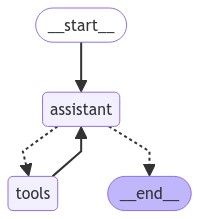

In [36]:
from IPython.display import Image, display

try:
    display(Image(part_1_graph.get_graph(xray=True).draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

## Example Conversation

In [37]:
shutil.copy(backup_file, db)

'travel2.sqlite'

In [40]:
# Now it's time to try out our mighty chatbot! Let's run it over the following list of dialog turns. If it hits a "RecursionLimit", that means the agent wasn't able to get an answer in the allocated number of steps. That's OK! We have more tricks up our sleeve in later sections of this tutorial.


import shutil
import uuid
from time import sleep
# Let's create an example conversation a user might have with the assistant
tutorial_questions =[
    "Show my flight infomation.",
    "Hi there, what time is my next flight?",
    # "Am i allowed to update my flight to something sooner? I want to leave later today",
    # "Update my flight to sometime next week then",
    # "The next available option is great",
    # "what about lodging and transportation?",
    # "Yeah i think i'd like an affordable hotel for my week-long stay (7 days). And I'll want to rent a car.",
    # "OK could you place a reservation for your recommended hotel? It sounds nice.",
    # "yes go ahead and book anything that's moderate expense and has availability.",
    # "Now for a car, what are my options?",
    # "Awesome let's just get the cheapest option. Go ahead and book for 7 days",
    # "Cool so now what recommendations do you have on excursions?",
    # "Are they available while I'm there?",
    # "interesting - i like the museums, what options are there? ",
    # "OK great pick one and book it for my second day there."
]

# Update with the backup file so we can restart from the original place in each section
shutil.copy(backup_file, db)
thread_id = str(uuid.uuid4())

config = {
    "configurable": {
        # The passenger_id is used in our flight tools to
        # fetch the user's flight information
        "passenger_id": "3442 587242",
        # Checkpoints are accessed by thread_id
        "thread_id": thread_id,
    }
}


_printed = set()
for question in tutorial_questions:
     events = part_1_graph.stream(
         {"messages": ("user", str(question))}, config, stream_mode="values"
    )
     sleep(2)
     for event in events:
          _print_event(event, _printed)
        

================================ Human Message =================================

Show my flight infomation.
================================== Ai Message ==================================
Tool Calls:
  fetch_user_flight_information (call_t2zx)
 Call ID: call_t2zx
  Args:
================================= Tool Message =================================
Name: fetch_user_flight_information

[{'ticket_no': '7240005432906569', 'book_ref': 'C46E9F', 'flight_id': 19250, 'flight_no': 'LX0112', 'departure_airport': 'CDG', 'arrival_airport': 'BSL', 'scheduled_departure': '2024-04-30 12:09:03.561731-04:00', 'scheduled_arrival': '2024-04-30 13:39:03.561731-04:00', 'seat_no': '18E', 'fare_conditions': 'Economy'}]


BadRequestError: Error code: 400 - {'error': {'message': "'messages.3' : for 'role:tool' the following must be satisfied[('messages.3.content' : value must be a string)]", 'type': 'invalid_request_error'}}